Q1

In [10]:
def euclidean_distance(point1,point2):
    return (((point2[0] - point1[0])**2)+(point2[1] - point1[1])**2)** 0.5

print(euclidean_distance([3,4],[5,6]))

2.8284271247461903


Q2

In [11]:
import numpy as np

def cosine_similarity(vec1, vec2):
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm1 = sum(x**2 for x in vec1) ** 0.5
    norm2 = sum(x**2 for x in vec2) ** 0.5
    return dot_product / (norm1 * norm2)
print(cosine_similarity([1, 2, 3], [4, 5, 6]))

0.9746318461970762


Q3

In [12]:
import pandas as pd
data = pd.read_excel('Book1.xlsx')
print(data.head())


   Height(CM)  Weight(CM)        Class
0         167          51  Underweight
1         182          62       Normal
2         176          69       Normal
3         173          64       Normal
4         172          65       Normal


In [13]:
print("Number of columns:", data.shape[1])

Number of columns: 3


In [14]:
print("Number of rows:", data.shape[0])

Number of rows: 10


In [15]:
rows = data.values.tolist()
print(rows)

[[167, 51, 'Underweight'], [182, 62, 'Normal'], [176, 69, 'Normal'], [173, 64, 'Normal'], [172, 65, 'Normal'], [174, 56, 'Underweight'], [169, 58, 'Normal'], [173, 57, 'Normal'], [170, 55, 'Normal'], [170, 57, '?']]


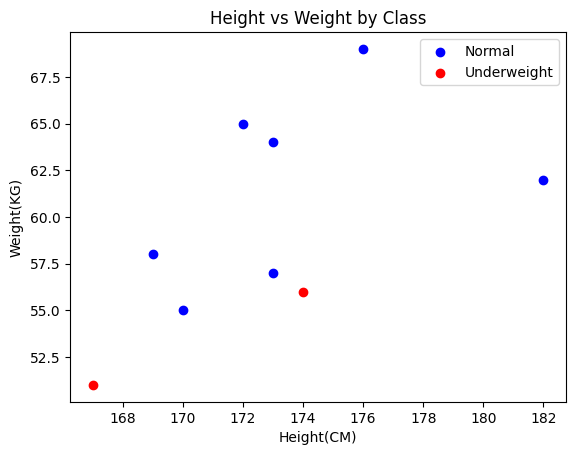

In [21]:
import matplotlib.pyplot as plt

normal_data = data[data['Class'] == 'Normal']
underweight_data = data[data['Class'] == 'Underweight']

plt.scatter(normal_data['Height(CM)'], normal_data['Weight(CM)'], color='blue', label='Normal')
plt.scatter(underweight_data['Height(CM)'], underweight_data['Weight(CM)'], color='red', label='Underweight')

plt.xlabel('Height(CM)')
plt.ylabel('Weight(KG)')
plt.title('Height vs Weight by Class')
plt.legend()
plt.show()

In [ ]:
pts = data.iloc[9][['Height(CM)', 'Weight(CM)']].values
distances = []

for idx, row in data.iloc[:-1].iterrows():
    point = row[['Height(CM)', 'Weight(CM)']].values
    dist = euclidean_distance(point, pts)
    distances.append((idx, dist, row['Class']))

distances.sort(key=lambda x: x[1])
for idx, dist, cls in distances:
    print(f"Index: {idx}, Distance: {dist}, Class: {cls}")
k = 3
nearest_classes = [distances[i][2] for i in range(k)]

class_counts = {}
for cls in nearest_classes:
    class_counts[cls] = class_counts.get(cls, 0) + 1

predicted_class = max(class_counts, key=class_counts.get)
nearest_classes = [distances[i][2] for i in range(k)]
class_counts = {}

for cls in nearest_classes:
    class_counts[cls] = class_counts.get(cls, 0) + 1
predicted_class = max(class_counts, key=class_counts.get)
print("Predicted class for the unknown point (k=3):", predicted_class)

Index: 6, Distance: 1.4142135623730951, Class: Normal
Index: 8, Distance: 2.0, Class: Normal
Index: 7, Distance: 3.0, Class: Normal
Index: 5, Distance: 4.123105625617661, Class: Underweight
Index: 0, Distance: 6.708203932499369, Class: Underweight
Index: 3, Distance: 7.615773105863909, Class: Normal
Index: 4, Distance: 8.246211251235321, Class: Normal
Index: 1, Distance: 13.0, Class: Normal
Index: 2, Distance: 13.416407864998739, Class: Normal
Predicted class for the unknown point (k=3): Normal
